# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv(r'C:\Users\Adm\Downloads\SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
faixas_latitude = pd.cut(sinasc_raw['munResLat'], [sinasc_raw['munResLat'].min(), -10.5, sinasc_raw['munResLat'].max()])

faixas_latitude.unique()

[(-13.5, -10.5], (-10.5, -8.769], NaN]
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.769]]

In [5]:
sinasc_raw['faixas_latitude'] = faixas_latitude
agrupamento = sinasc_raw.groupby('faixas_latitude')

agrupamento[['QTDFILVIVO', 'QTDFILMORT']].agg([('Média','mean'),
                                              ('Mínimo',min),
                                              ('Máximo',max),
                                              ('Mediana',np.median),
                                              ('Desvio Padrão',np.std),
                                              ('Variância',np.var)
                                             ])

QTDFILVIVO                                                \
                     Média Mínimo Máximo Mediana Desvio Padrão Variância   
faixas_latitude                                                            
(-13.5, -10.5]    0.981373    0.0   30.0     1.0      1.139172  1.297712   
(-10.5, -8.769]   1.129317    0.0   12.0     1.0      1.198613  1.436674   

                QTDFILMORT                                                
                     Média Mínimo Máximo Mediana Desvio Padrão Variância  
faixas_latitude                                                           
(-13.5, -10.5]    0.242396    0.0   28.0     0.0      0.599642  0.359570  
(-10.5, -8.769]   0.291770    0.0    9.0     0.0      0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
faixas_m2 = pd.cut(sinasc_raw['munResArea'], [sinasc_raw['munResArea'].min(), 3000, sinasc_raw['munResArea'].max()])
sinasc_raw['faixas_m2'] = faixas_m2

sinasc_raw['faixas_m2'].unique()

[(3000.0, 34096.394], (459.978, 3000.0], NaN]
Categories (2, interval[float64, right]): [(459.978, 3000.0] < (3000.0, 34096.394]]

In [7]:
agrupamento_1 = sinasc_raw.groupby('faixas_m2')

agrupamento_1[['PESO', 'APGAR1']].agg([('Média','mean'),
                                       ('Mínimo',min),
                                       ('Máximo',max),
                                       ('Mediana',np.median),
                                       ('Desvio Padrão',np.std),
                                       ('Variância',np.var)
                                       ])

PESO                                      \
                           Média Mínimo Máximo Mediana Desvio Padrão   
faixas_m2                                                              
(459.978, 3000.0]    3218.770126    258   5720  3250.0    532.158122   
(3000.0, 34096.394]  3249.134538    292   5985  3280.0    547.716582   

                                      APGAR1                        \
                         Variância     Média Mínimo Máximo Mediana   
faixas_m2                                                            
(459.978, 3000.0]    283192.267093  8.074218    0.0   10.0     8.0   
(3000.0, 34096.394]  299993.453720  8.152808    0.0   10.0     8.0   

                                             
                    Desvio Padrão Variância  
faixas_m2                                    
(459.978, 3000.0]        1.009443  1.018976  
(3000.0, 34096.394]      0.978517  0.957495

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
faixas_alt = pd.cut(sinasc_raw['munResAlt'], bins=5)
sinasc_raw['faixas_alt'] = faixas_alt

In [9]:
agrupamento_2 = sinasc_raw.groupby('faixas_alt')

agrupamento_2[['IDADEPAI', 'IDADEMAE']].agg([('Média','mean'),
                                             ('Mínimo',min),
                                             ('Máximo',max),
                                             ('Mediana',np.median),
                                             ('Desvio Padrão',np.std),
                                             ('Variância',np.var)
                                            ])

IDADEPAI                                                 \
                    Média Mínimo Máximo Mediana Desvio Padrão  Variância   
faixas_alt                                                                 
(84.49, 187.0]  31.125395   15.0   73.0    30.0      7.884009  62.157606   
(187.0, 289.0]  31.076456   16.0   86.0    30.0      7.654058  58.584601   
(289.0, 391.0]  29.852547   17.0   61.0    29.0      7.369453  54.308844   
(391.0, 493.0]  30.151515   16.0   53.0    30.0      7.439681  55.348854   
(493.0, 595.0]  34.152941   18.0   60.0    34.0      6.812807  46.414340   

                 IDADEMAE                                                 
                    Média Mínimo Máximo Mediana Desvio Padrão  Variância  
faixas_alt                                                                
(84.49, 187.0]  26.027354     11     52    25.0      6.426582  41.300960  
(187.0, 289.0]  26.280266     13     53    26.0      6.213165  38.603418  
(289.0, 391.0]  25.841187     13     53    25.0      6.402653  40.993965  
(391.0, 493.0]  26.448370     14     47    26.0      6.484738  42.051823  
(493.0, 595.0]  26.433962     14     46    26.0      6.310937  39.827921

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [10]:
url = "https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia"

In [11]:
lista_de_tabelas = pd.read_html(url)[1:3]

In [12]:
regioes_imediatas = pd.concat([lista_de_tabelas[0], lista_de_tabelas[1]])
regioes_imediatas.reset_index(inplace=True)
regioes_imediatas.head(2)

,index,Região geográfica imediata[1],Código,Municípios
0,0,Porto Velho,110001,Candeias do Jamari
1,1,Porto Velho,110001,Guajará-Mirim


In [13]:
mapping = {}
for i in range(0,regioes_imediatas.shape[0]):
    mapping[regioes_imediatas.loc[i]['Municípios']] = regioes_imediatas.loc[i]['Região geográfica imediata[1]']

In [14]:
mapping

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Alto Paraíso': 'Ariquemes',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Governador Jorge Teixeira': 'Jaru',
 'Jaru': 'Jaru',
 "Machadinho d'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru',
 "Alvorada d'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 "Alta Floresta d'Oeste": 'Cacoal',
 'Alt

In [15]:
sinasc_raw.drop(index=1863, inplace=True)
sinasc_raw.reset_index(inplace=True)

In [16]:
munresunique = list(sinasc_raw['munResNome'].unique())
mapping_keys = list(mapping.keys())

In [17]:
chaves_anomalas = list(filter(lambda x: x not in munresunique, mapping_keys))

chaves_anomalas

["Machadinho d'Oeste",
 "Alvorada d'Oeste",
 "Alta Floresta d'Oeste",
 "Espigão d'Oeste",
 "Nova Brasilândia d'Oeste",
 "Santa Luzia d'Oeste",
 "São Felipe d'Oeste"]

In [18]:
#Fazendo as alterações devidas
novas_chaves = [chave.replace("d'Oeste","D'Oeste") for chave in chaves_anomalas]
for i in range(0, len(novas_chaves)):
    mapping[novas_chaves[i]] = mapping[chaves_anomalas[i]]
    del mapping[chaves_anomalas[i]]

In [19]:
sinasc_index_municipio = sinasc_raw.set_index('munResNome')
sinasc_index_municipio.index.name = "Região \n Imediata" 

sinasc_index_municipio[['IDADEMAE']].groupby(mapping).mean()

,IDADEMAE
Região Imediata,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


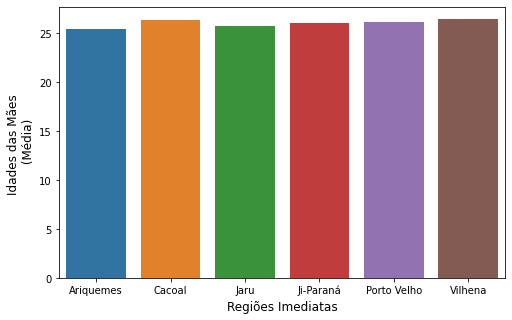

In [20]:
agrup = sinasc_index_municipio[['IDADEMAE']].groupby(mapping).mean()

plt.figure(figsize=(8,5))
sns.barplot(x=list(agrup.index), y=[round(float(valor),2) for valor in agrup.values])
plt.xlabel("Regiões Imediatas", fontsize=12)
plt.ylabel("Idades das Mães \n (Média)", fontsize=12);

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [21]:
def valores_anomolos_P(valores_referencia:list, valores_comparativos:list):
    """Retorna dois valores por tupla: um valor anômolo relativo ao valor de um conjunto de referência;
       Lê-se anômolo: valor com semântica igual ao outro valor, mas escrito diferente;
       Objetivo da função: fornecer valores para posterior correção de itens de uma coluna."""
    
    _size = 1
    valores_anomolos_provaveis = []

    for ind in range(len(valores_referencia)):
        filtro_P_valores = list(filter(lambda x: len(x) >= len(valores_referencia[ind])-3, valores_comparativos))
        for i in range(len(filtro_P_valores)):
            if valores_referencia[ind] not in valores_comparativos:
                while (_size <= 6) and (valores_referencia[ind][:_size] == filtro_P_valores[i][:_size]):
                    if _size == 5:
                        valores_anomolos_provaveis.append((valores_referencia[ind], filtro_P_valores[i]))
                    _size = _size + 1
            _size = 1
    return valores_anomolos_provaveis

In [22]:
url1 = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

In [23]:
lista_tabelas_1 = pd.read_html(url1)

In [24]:
lista_tabelas_1[0].head(2)

Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto

In [25]:
colunas_rename = ['Posicao','Municipio','IDH_municipal','IDH_renda','IDH_longevidade','IDH_educacao']
tabela_0 = lista_tabelas_1[0]
tabela_0.columns = colunas_rename
tabela_0

,Posicao,Municipio,IDH_municipal,IDH_renda,IDH_longevidade,IDH_educacao
0,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736,0.764,0.819,0.638
3,2,Vilhena,0.731,0.734,0.808,0.659
4,3,Cacoal,0.718,0.727,0.821,0.620
5,4,Ji-Paraná,0.714,0.728,0.810,0.617
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613
7,6,Ariquemes,0.702,0.716,0.806,0.600
8,7,Rolim de Moura,0.700,0.709,0.808,0.598
9,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio


In [26]:
tabela_0['IDH_faixas'] = np.nan
tabela_0.loc[range(0,9), 'IDH_faixas'] = 'IDH_alto'
tabela_0.loc[range(9,46), 'IDH_faixas'] = 'IDH_médio'
tabela_0.loc[range(46,56), 'IDH_faixas'] = 'IDH_baixo'

In [27]:
tabela_0.drop(index=[0,1,9,46,56,57], inplace=True)
tabela_0.reset_index(inplace=True)

In [28]:
municipios_= list(tabela_0['Municipio'].unique())
uniques_munres = list(sinasc_raw['munResNome'].unique())

In [29]:
chaves_anomalas = valores_anomolos_P(uniques_munres, municipios_)
chaves_anomalas

[("Alta Floresta D'Oeste", "Alta Floresta d'Oeste"),
 ("São Felipe D'Oeste", "São Felipe d'Oeste"),
 ("São Felipe D'Oeste", 'São Francisco do Guaporé'),
 ("Machadinho D'Oeste", "Machadinho d'Oeste"),
 ("Santa Luzia D'Oeste", "Santa Luzia d'Oeste"),
 ("Espigão D'Oeste", "Espigão d'Oeste"),
 ("Nova Brasilândia D'Oeste", "Nova Brasilândia d'Oeste"),
 ("Alvorada D'Oeste", "Alvorada d'Oeste")]

In [30]:
chaves_anomalas.remove(("São Felipe D'Oeste", 'São Francisco do Guaporé'))

In [31]:
for i in range(len(chaves_anomalas)):
    tabela_0['Municipio'] = tabela_0['Municipio'].replace(chaves_anomalas[i][1], chaves_anomalas[i][0])

In [32]:
mapping = {}
for i in range(0,tabela_0.shape[0]):
    mapping[tabela_0.loc[i]["Municipio"]] = tabela_0.loc[i]["IDH_faixas"]

In [33]:
agrupament = sinasc_raw.set_index("munResNome").copy()
agrupament = agrupament.pivot_table(index=[mapping, "SEXO"], 
                                    values=["PESO","QTDFILVIVO","QTDFILMORT","CONSULTAS","APGAR1","APGAR5"],
                                    aggfunc= "median")

agrupament

APGAR1  APGAR5  CONSULTAS    PESO  QTDFILMORT  \
munResNome SEXO                                                       
IDH_alto   Feminino      8.0     9.0          4  3214.5         0.0   
           Masculino     8.0     9.0          4  3340.0         0.0   
IDH_baixo  Feminino      8.0     9.0          4  3210.0         0.0   
           Masculino     8.0     9.0          4  3300.0         0.0   
IDH_médio  Feminino      8.0     9.0          4  3210.0         0.0   
           Masculino     8.0     9.0          4  3320.0         0.0   

                      QTDFILVIVO  
munResNome SEXO                   
IDH_alto   Feminino          1.0  
           Masculino         1.0  
IDH_baixo  Feminino          1.0  
           Masculino         1.0  
IDH_médio  Feminino          1.0  
           Masculino         1.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM

In [34]:
url1 = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
lista_tabelas1 = pd.read_html(url1)

In [35]:
tabela_unica1 = lista_tabelas1[0]
tabela_unica1

,Posição,Município,IFDM Consolidado (2013)
,Desenvolvimento alto,Desenvolvimento alto,Desenvolvimento alto
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850


In [36]:
tabela_unica1.columns = "posicao municipio IFDM_2013".split()

In [37]:
tabela_unica1.drop(index=[0,1,28,55,56],inplace=True)
tabela_unica1['IFDM_2013'] = tabela_unica1['IFDM_2013'].astype(float)
tabela_unica1.reset_index(inplace=True)

In [38]:
corte = [tabela_unica1['IFDM_2013'].min(), 0.60, tabela_unica1['IFDM_2013'].max()]
corte

[0.4562, 0.6, 0.7746]

In [39]:
tabela_unica1['IFDM_2013'] = pd.cut(tabela_unica1['IFDM_2013'],
                                    bins=corte,
                                    labels=["Desenvolvimento Regular", "Desenvolvimento Moderado"])

In [40]:
anomalias = valores_anomolos_P(list(sinasc_raw['munResNome'].unique()),
                               list(tabela_unica1['municipio'].unique()))
anomalias

[("Alta Floresta D'Oeste", "Alta Floresta d'Oeste"),
 ("São Felipe D'Oeste", 'São Francisco do Guaporé'),
 ("São Felipe D'Oeste", "São Felipe d'Oeste"),
 ("Machadinho D'Oeste", "Machadinho d'Oeste"),
 ("Santa Luzia D'Oeste", "Santa Luzia d'Oeste"),
 ("Espigão D'Oeste", "Espigão d'Oeste"),
 ("Nova Brasilândia D'Oeste", "Nova Brasilândia d'Oeste"),
 ("Alvorada D'Oeste", "Alvorada d'Oeste")]

In [41]:
anomalias.remove(("São Felipe D'Oeste", 'São Francisco do Guaporé'))

In [42]:
for i in range(len(anomalias)):
    tabela_unica1['municipio'] = tabela_unica1['municipio'].replace(anomalias[i][1], anomalias[i][0]) 

In [43]:
mapping = {}
for i in range(tabela_unica1.shape[0]):
    mapping[tabela_unica1.loc[i]['municipio']] = tabela_unica1.loc[i]['IFDM_2013']

In [44]:
agrupament1 = sinasc_raw.set_index("munResNome").groupby(mapping)

agrupament1 = agrupament1[['PESO','APGAR1','APGAR5']].agg(([('Mínimo',min),
                                                            ('Máximo',max),
                                                            ('Mediana',np.median),
                                                            ('Desvio Padrão',np.std),
                                                            ]))
agrupament1.index.name = 'IFDM'

agrupament1

PESO                              APGAR1         \
                         Mínimo Máximo Mediana Desvio Padrão Mínimo Máximo   
IFDM                                                                         
Desenvolvimento Moderado    258   5720  3274.0    547.829184    0.0   10.0   
Desenvolvimento Regular     425   5985  3270.0    533.301731    0.0   10.0   

                                               APGAR5                 \
                         Mediana Desvio Padrão Mínimo Máximo Mediana   
IFDM                                                                   
Desenvolvimento Moderado     8.0      0.970513    0.0   10.0     9.0   
Desenvolvimento Regular      8.0      1.044388    0.0   10.0     9.0   

                                        
                         Desvio Padrão  
IFDM                                    
Desenvolvimento Moderado      0.773676  
Desenvolvimento Regular       0.864916

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [45]:
url2 = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
lista_tabelas2 = pd.read_html(url2)

In [46]:
tabela_unica2 = lista_tabelas2[0]
for i in range(1,6):
    tabela_unica2 = pd.concat([tabela_unica2, lista_tabelas2[i]])
tabela_unica2.head(3)

Posição                   Município         PIB Alteração Posição  \
  Em 2019 Mudança (2014)    Município         PIB Alteração Em 2014   
0     1.0            (0)  Porto Velho  17 912 070       NaN     NaN   
1     2.0            (0)    Ji-Paraná   3 783 972       NaN     NaN   
2     3.0            (0)      Vilhena   2 831 175       NaN     NaN   

                  
  Mudança (2011)  
0            NaN  
1            NaN  
2            NaN

In [47]:
tabela_unica2.columns = ['ranking_2019', 'mudanca_2014','municipio','PIB','alteracao','ranking_2014','mudanca_2011']
tabela_unica2.reset_index(inplace=True)

In [48]:
tabela_unica2.dtypes

index             int64
ranking_2019    float64
mudanca_2014     object
municipio        object
PIB              object
alteracao       float64
ranking_2014    float64
mudanca_2011     object
dtype: object

In [49]:
tabela_unica2['PIB'].unique()

array(['17 912 070', '3 783 972', '2 831 175', '2 579 830', '2 261 644',
       '1 500 890', '1 283 434', '1 164 877', '893 000', '834 000',
       '726 000', '633 000', '625 000', '616 000', '548 000', '529 000',
       '507 000', '496 000', '428 000', '385 000', '360 000', '358 000',
       '353 000', '335 000', '219 152', '213 410', '208 821', '204 098',
       '190 331', '188 218', '174 633', '172 143', '171 878', '169 429',
       '163 955', '148 027', '140 601', '135 934', '129 399', '129 351',
       '116 742', '116 635', '113 031', '105 208', '92 346', '80 759',
       '76 854', '76 756', '72 089', '72 084', '59 779', '52 908'],
      dtype=object)

In [50]:
tabela_unica2['PIB'] = tabela_unica2['PIB'].apply(lambda value: value.replace(" ",""))
tabela_unica2['PIB'] = tabela_unica2['PIB'].astype(int)
tabela_unica2['PIB'].dtypes

dtype('int32')

In [51]:
#Verificar valores díspares
mun_tabela = list(tabela_unica2['municipio'].unique())
mun_sinasc = list(sinasc_raw['munResNome'].unique())

In [52]:
chaves_anomalas = valores_anomolos_P(mun_sinasc, mun_tabela)

chaves_anomalas

[("Alta Floresta D'Oeste", 'Alta Floresta do Oeste'),
 ("São Felipe D'Oeste", 'São Francisco do Guaporé'),
 ("São Felipe D'Oeste", 'São Felipe do Oeste'),
 ("Machadinho D'Oeste", 'Machadinho do Oeste'),
 ("Santa Luzia D'Oeste", 'Santa Luzia do Oeste'),
 ("Espigão D'Oeste", "Espigão d'Oeste"),
 ("Nova Brasilândia D'Oeste", 'Nova Brasilândia do Oeste'),
 ("Alvorada D'Oeste", 'Alvorada do Oeste')]

In [53]:
chaves_anomalas.remove(("São Felipe D'Oeste", 'São Francisco do Guaporé'))

for i in range(len(chaves_anomalas)):
    tabela_unica2['municipio'] = tabela_unica2['municipio'].replace(chaves_anomalas[i][1], chaves_anomalas[i][0])


In [54]:
print(tabela_unica2['PIB'].min())
print(tabela_unica2['PIB'].max())

52908
17912070


In [55]:
pd.cut(tabela_unica2['PIB'],[52000, 170000, 600000, 1000000, 18000000]).unique()

[(1000000, 18000000], (600000, 1000000], (170000, 600000], (52000, 170000]]
Categories (4, interval[int64, right]): [(52000, 170000] < (170000, 600000] < (600000, 1000000] < (1000000, 18000000]]

In [56]:
tabela_unica2['PIB'] = pd.cut(tabela_unica2['PIB'],bins=[52000, 170000, 600000, 10000000, 18000000],
                             labels = ["Menor que 170.000,00","Entre 170.000,00 e 600.000,00",
                                       "Entre 600.000 e 10.000.000,00", "Maior que 10.000.000,00"])

In [57]:
mapping = {}
for i in range(tabela_unica2.shape[0]):
    mapping[tabela_unica2.loc[i]['municipio']] = tabela_unica2.loc[i]['PIB']

In [58]:
agrupament2 = sinasc_raw.set_index('munResNome')[['PESO','QTDFILVIVO','QTDFILMORT']].groupby(mapping).agg([('Mínimo',min),
                                                                                                            ('Máximo',max),
                                                                                                            ('Mediana',np.median),
                                                                                                            ('Desvio Padrão',np.std),
                                                                                                            ])

agrupament2.index.name = 'PIB \n Municipal'

agrupament2

PESO                              QTDFILVIVO  \
                              Mínimo Máximo Mediana Desvio Padrão     Mínimo   
PIB \n Municipal                                                               
Entre 170.000,00 e 600.000,00    258   5135  3270.0    537.200476        0.0   
Entre 600.000 e 10.000.000,00    285   5985  3270.0    526.596548        0.0   
Maior que 10.000.000,00          295   5060  3280.0    579.325149        0.0   
Menor que 170.000,00             320   4785  3250.0    517.503629        0.0   

                                                           QTDFILMORT         \
                              Máximo Mediana Desvio Padrão     Mínimo Máximo   
PIB \n Municipal                                                               
Entre 170.000,00 e 600.000,00   14.0     1.0      1.215259        0.0    6.0   
Entre 600.000 e 10.000.000,00   12.0     1.0      1.102922        0.0   28.0   
Maior que 10.000.000,00         12.0     1.0      1.222640        0.0    9.0   
Menor que 170.000,00            30.0     1.0      1.274657        0.0    4.0   

                                                     
                              Mediana Desvio Padrão  
PIB \n Municipal                                     
Entre 170.000,00 e 600.000,00     0.0      0.568676  
Entre 600.000 e 10.000.000,00     0.0      0.621921  
Maior que 10.000.000,00           0.0      0.644580  
Menor que 170.000,00              0.0      0.506780

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [59]:
agrupament

APGAR1  APGAR5  CONSULTAS    PESO  QTDFILMORT  \
munResNome SEXO                                                       
IDH_alto   Feminino      8.0     9.0          4  3214.5         0.0   
           Masculino     8.0     9.0          4  3340.0         0.0   
IDH_baixo  Feminino      8.0     9.0          4  3210.0         0.0   
           Masculino     8.0     9.0          4  3300.0         0.0   
IDH_médio  Feminino      8.0     9.0          4  3210.0         0.0   
           Masculino     8.0     9.0          4  3320.0         0.0   

                      QTDFILVIVO  
munResNome SEXO                   
IDH_alto   Feminino          1.0  
           Masculino         1.0  
IDH_baixo  Feminino          1.0  
           Masculino         1.0  
IDH_médio  Feminino          1.0  
           Masculino         1.0

### Insight IDH
O Índice de Desenvolvimento Humano não é uma métrica que consiga apresentar diferenças signigicativas quanto ao peso do bebê, o tipo de APGAR no primeiro/quinto minuto, nem a quantidade de filhos mortos/vivos sofreram alterações nos subgrupos IDH, tão quanto houve diferenças em ambos os sexos. A métrica aplicada é a mediana.

In [60]:
agrupament1

PESO                              APGAR1         \
                         Mínimo Máximo Mediana Desvio Padrão Mínimo Máximo   
IFDM                                                                         
Desenvolvimento Moderado    258   5720  3274.0    547.829184    0.0   10.0   
Desenvolvimento Regular     425   5985  3270.0    533.301731    0.0   10.0   

                                               APGAR5                 \
                         Mediana Desvio Padrão Mínimo Máximo Mediana   
IFDM                                                                   
Desenvolvimento Moderado     8.0      0.970513    0.0   10.0     9.0   
Desenvolvimento Regular      8.0      1.044388    0.0   10.0     9.0   

                                        
                         Desvio Padrão  
IFDM                                    
Desenvolvimento Moderado      0.773676  
Desenvolvimento Regular       0.864916

### Insight IFDM
Um ponto que me chamou atenção foi o peso mínimo em municípios com Índice Firjan Moderado relativo ao regular, porque o peso mínimo do regular é 60% maior que o peso do grupo moderado. Isso pode levantar algumas hipóteses de que a inscidência de partos prematuros nestes municípios contam com bebês mais fragilizados, hipótese essa que seria confirmada observando a cauda esquerda da distribuição, cruzando estas informações ao período gestacional que ocorrera o parto.

In [62]:
agrupament2

PESO                              QTDFILVIVO  \
                              Mínimo Máximo Mediana Desvio Padrão     Mínimo   
PIB \n Municipal                                                               
Entre 170.000,00 e 600.000,00    258   5135  3270.0    537.200476        0.0   
Entre 600.000 e 10.000.000,00    285   5985  3270.0    526.596548        0.0   
Maior que 10.000.000,00          295   5060  3280.0    579.325149        0.0   
Menor que 170.000,00             320   4785  3250.0    517.503629        0.0   

                                                           QTDFILMORT         \
                              Máximo Mediana Desvio Padrão     Mínimo Máximo   
PIB \n Municipal                                                               
Entre 170.000,00 e 600.000,00   14.0     1.0      1.215259        0.0    6.0   
Entre 600.000 e 10.000.000,00   12.0     1.0      1.102922        0.0   28.0   
Maior que 10.000.000,00         12.0     1.0      1.222640        0.0    9.0   
Menor que 170.000,00            30.0     1.0      1.274657        0.0    4.0   

                                                     
                              Mediana Desvio Padrão  
PIB \n Municipal                                     
Entre 170.000,00 e 600.000,00     0.0      0.568676  
Entre 600.000 e 10.000.000,00     0.0      0.621921  
Maior que 10.000.000,00           0.0      0.644580  
Menor que 170.000,00              0.0      0.506780

### Insight PIB
Um dado interessante que se mostrou presente é que a região com menor PIB é onde há a maior quantidade de filhos vivos registrado. Municípios que tem o menor PIB são cidades pequenas ou rurais, deduz-se que outliers/valor máx como esse podem ter maior probabilidade de ocorrência nestes municípios.
Nesse sentido, observa-se um percurso quase linear:
- 30 filhos vivos (PIB menor que 170.000)
- 14 filhos vivos (PIB entre 170.000 e 600.000)
- 12 filhos vivos (PIB entre 600.000 e 10.000.000)
- 12 filhos vivos (PIB maior que 10.000.000)